In [12]:
import tensorflow as tf
import numpy as np

In [2]:
import numpy
numpy.version.version


'1.14.5'

In [9]:
b = tf.Variable(tf.zeros(100))
W = tf.Variable(tf.random_uniform((784,100),-1,1))
x = tf.placeholder(tf.float32, (100,784))
h = tf.nn.relu(tf.matmul(x,W)+b)


In [11]:
tf.get_default_graph().get_operations()

[<tf.Operation 'zeros/shape_as_tensor' type=Const>,
 <tf.Operation 'zeros/Const' type=Const>,
 <tf.Operation 'zeros' type=Fill>,
 <tf.Operation 'Variable' type=VariableV2>,
 <tf.Operation 'Variable/Assign' type=Assign>,
 <tf.Operation 'Variable/read' type=Identity>,
 <tf.Operation 'random_uniform/shape' type=Const>,
 <tf.Operation 'random_uniform/min' type=Const>,
 <tf.Operation 'random_uniform/max' type=Const>,
 <tf.Operation 'random_uniform/RandomUniform' type=RandomUniform>,
 <tf.Operation 'random_uniform/sub' type=Sub>,
 <tf.Operation 'random_uniform/mul' type=Mul>,
 <tf.Operation 'random_uniform' type=Add>,
 <tf.Operation 'Variable_1' type=VariableV2>,
 <tf.Operation 'Variable_1/Assign' type=Assign>,
 <tf.Operation 'Variable_1/read' type=Identity>,
 <tf.Operation 'Placeholder' type=Placeholder>,
 <tf.Operation 'MatMul' type=MatMul>,
 <tf.Operation 'add' type=Add>,
 <tf.Operation 'Relu' type=Relu>]

In [26]:
# CPU or GPU
sess = tf.Session() 
print (sess.run(tf.global_variables_initializer()))
# fetches, feeds

print(sess.run(h, {x: np.random.random([100,784])}))

None
[[ 0.         16.1947      5.279145   ...  4.7467175   0.
   0.        ]
 [ 0.         26.004883    6.4393716  ...  0.          0.
   0.97152835]
 [ 0.         20.151192   11.046973   ...  4.649555    0.
   0.        ]
 ...
 [ 0.          8.803308    2.136807   ... 14.632132    3.5834846
   0.        ]
 [ 0.         22.101067    4.757223   ...  0.          0.
   0.        ]
 [ 0.         11.332206    0.94634795 ...  6.173396    2.3821378
   0.        ]]


In [25]:
# define the loss
prediction = tf.nn.softmax(h)
label = tf.placeholder(tf.float32, [100,10])
cross_entropy = - tf.reduce_sum(label * tf.log(prediction), axis =1)

TypeError: softmax() missing 1 required positional argument: 'logits'

In [ ]:
# compute the gradient
train_step = tf.train.GradientDescentOptimizer(0.5).minimize(cross_entropy)

In [ ]:
# iteration
for i in range(100):
    batch_x, batch_label = data.next_batch()
    sess.run(train_step, feed_dict = { x: batch_x, label : batch_label})
             

In [36]:
p = np.array(range(100)).reshape(10,10)
y = np.array(range(10))

In [37]:
print(y)
print(p)

[0 1 2 3 4 5 6 7 8 9]
[[ 0  1  2  3  4  5  6  7  8  9]
 [10 11 12 13 14 15 16 17 18 19]
 [20 21 22 23 24 25 26 27 28 29]
 [30 31 32 33 34 35 36 37 38 39]
 [40 41 42 43 44 45 46 47 48 49]
 [50 51 52 53 54 55 56 57 58 59]
 [60 61 62 63 64 65 66 67 68 69]
 [70 71 72 73 74 75 76 77 78 79]
 [80 81 82 83 84 85 86 87 88 89]
 [90 91 92 93 94 95 96 97 98 99]]


In [38]:
p[range(10),y]

array([ 0, 11, 22, 33, 44, 55, 66, 77, 88, 99])

In [1]:
import numpy as np
import tensorflow as tf 
import matplotlib 
from matplotlib import pyplot as plt 

def generate_dataset():
    # y = 2x + e
    # where e is sample from normal distribution 
    x_batch = np.linspace(-2,2,100)
    y_batch = 2 * x_batch + np.random.random(x_batch.shape) * 4
    return x_batch, y_batch

# the tensorflow graph
def linear_regression():
    # have None as the shape make it more general
    x = tf.placeholder(tf.float32, shape=(None, ), name = 'x')
    y = tf.placeholder(tf.float32, shape=(None, ), name = 'y')

    with tf.variable_scope ('lreg') as scope:
        w = tf.Variable(np.random.normal(), name = 'W')
        b = tf.Variable(np.random.normal(), name = 'B')
        y_pred = tf.multiply(w, x) + b
        loss = tf.reduce_mean(tf.square(y - y_pred))
    return x, y, y_pred, loss

def run():
    x_batch, y_batch = generate_dataset()
    ####
    x, y, y_pred, loss = linear_regression()
    optimizer = tf.train.GradientDescentOptimizer(0.1).minimize(loss)
    init = tf.global_variables_initializer()
    with tf.Session() as sess:
        sess.run(init)
        feed_dict = {x:x_batch, y: y_batch}
        plt.figure(figsize = [9,9])
        for i in range(50):
            loss_val,y_pred_batch, _ = sess.run([loss,y_pred, optimizer], feed_dict)
            print('loss:', loss_val.mean())
            if i %10 == 0:
                plt.plot(x_batch, y_pred_batch, label = i)
        ##### we could extract some intermediter values by just run, but not update, so not optimizer and y_batch
        y_pred_batch = sess.run(y_pred, {x: x_batch})
    plt.scatter(x_batch, y_batch)
    plt.plot(x_batch, y_pred_batch, label = "final")
    plt.legend()
    plt.show()

/Users/liangjianzhong/anaconda3/lib/python3.6/site-packages/h5py/__init__.py:34: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


loss: 7.148805
loss: 4.827264
loss: 3.4806309
loss: 2.6925237
loss: 2.2272098
loss: 1.9501146
loss: 1.7837455
loss: 1.6830837
loss: 1.6217408
loss: 1.5841144
loss: 1.5608983
loss: 1.5464985
loss: 1.5375257
loss: 1.5319116
loss: 1.528387
loss: 1.5261673
loss: 1.524766
loss: 1.5238789
loss: 1.5233169
loss: 1.5229601
loss: 1.522733
loss: 1.5225888
loss: 1.5224968
loss: 1.522438
loss: 1.5224009
loss: 1.5223767
loss: 1.5223613
loss: 1.5223515
loss: 1.5223455
loss: 1.5223415
loss: 1.522339
loss: 1.5223373
loss: 1.5223365
loss: 1.5223358
loss: 1.5223352
loss: 1.5223349
loss: 1.5223346
loss: 1.5223347
loss: 1.5223345
loss: 1.5223346
loss: 1.5223345
loss: 1.5223346
loss: 1.5223346
loss: 1.5223346
loss: 1.5223343
loss: 1.5223345
loss: 1.5223345
loss: 1.5223345
loss: 1.5223343
loss: 1.5223343


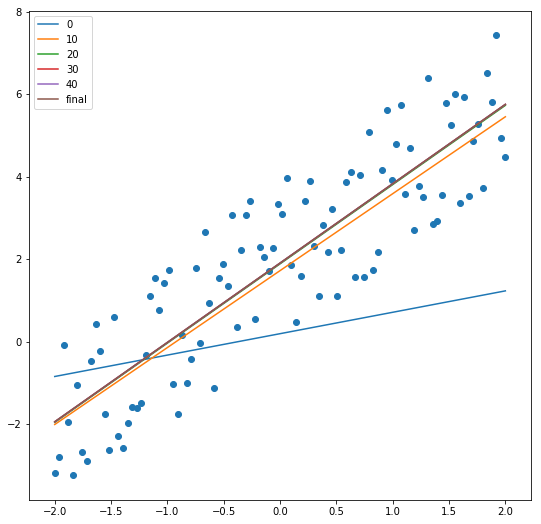

In [2]:
run()

In [81]:
np.random.random(100) < 0

array([False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False])

In [15]:
from nltk.tokenize.util import xml_escape
from nltk.corpus.reader.xmldocs import XMLCorpusReader

In [11]:
with open('ENG_DF_001503_20160415_G00A0AA3J.xml', 'r') as myfile:
    data=myfile.read()

In [13]:
xml_escape(data)

'&lt;doc id=&quot;ENG_DF_001503_20160415_G00A0AA3J&quot;&gt;\n&lt;headline&gt;\nMoved to France 6 months ago and love it but...\n&lt;/headline&gt;\n&lt;post author=&quot;Kimntheo11&quot; datetime=&quot;2016-04-15T12:16:00&quot; id=&quot;p1&quot;&gt;\n&lt;img src=&quot;http://britishexpats.com/forum/images/smilies/fingerscrossed.gif&quot;/&gt; hiya everyone. I&apos;m here for help and a new community network.\nIs this forum easy to navigate?\nI see it&apos;s got every country advertised. How do I just get posts for France?\nI&apos;m taking French lessons to improve my French speach but its going slow.\nMy son is 5 years old and has been at the local school for 6 months and he understands 90% of French he hears. With I could get as much French spoken to me as he does.\nThe but... In my title is I&apos;m struggling for work. I&apos;m willing to do anything. I live with my parents and we are moving further south in a few months. Wondering if anyone on here is in the Charente maritime area 

In [14]:
with open('ENG_DF_001503_20160415_G00A0AA3J_escape.xml', 'w') as myfile:
    myfile.write(xml_escape(data))

In [34]:
path = '/Users/liangjianzhong/Desktop/internship/EDL-2018/code/source_documents/eng/df'

In [35]:
reader = XMLCorpusReader(path, '.*\.xml')

In [37]:
reader.offsets('ENG_DF_000259_20130830_G00A0F9BC.xml')

AttributeError: 'XMLCorpusReader' object has no attribute 'offsets'